Домашнее задание включает в себя 2 задачи:

Даны 3 колонки с данными: 'Name', 'Start Date' и 'End Date'. 
- 'Name' - уникальное название заявки, пришедшей в центр технической поддержки. 
- 'Start Date' - время поступления заявки. 
- 'End Date' - время обработки заявок.


Необходимо рассчитать еще одну колонку - 'Implementation time', показывающую количество рабочих часов (https://en.wikipedia.org/wiki/Business_hours), потраченных на обработку каждой заявки.
Рабочие часы начинаются в 08:00 и заканчиваются в 18:00. Рабочая неделя ПН-ПТ, есть праздники (РФ).

Пример (Даты в ISO):
```
Name	Start Date	End Date	Implementation time	Comment
1	2020-11-01T08:00:00	2020-11-01T18:00:00	0	Выходной
2	2020-11-01T08:00:00	2020-11-02T09:30:00	1.5	Выходной + 1.5 часа в ПН
3	2020-11-01T08:00:00	2020-11-05T19:00:00	24	Выходной + 8 ПН + 8 ВТ + СР - выходной + 8 ЧТ
```
И т.д.

Для задания необходимо:

- Самостоятельно сгенерировать случайные 
        'Name', 'Start Date' и 'End Date' при условии 01-01-2019 <= 'Start Date' <= 'End Date' < 01-01-2020 
        (N датасетов, где размер датасета 10^N, N < 8 - натуральное).
- По исходным данным построить гистограмму "сколько поступило и обработано заявок по месяцам".
- Построить график скорости работы вашей программы в зависимости от N.
- Написать тесты с пояснениями.

In [57]:
import pandas as pd
import datetime
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:

def generate_year(freq='30'):
    
    russian_holidays = [
        '2019-01-01','2019-01-02','2019-01-03','2019-01-04','2019-01-05','2019-01-06','2019-01-07',
        '2019-01-08','2019-02-23','2019-02-24','2019-03-08','2019-03-09','2019-03-10','2019-05-01',
        '2019-05-02','2019-05-03','2019-05-04','2019-05-05','2019-05-09','2019-05-10','2019-05-11',
        '2019-05-12','2019-06-12','2019-11-04'
    ]

    russian_holidays = list(map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date(), russian_holidays))
    
    the_whole_year = pd.DataFrame(pd.date_range(start='2019-01-01', end='2020-01-02', freq=f'{freq}min', name='timestamp'))
    
    the_whole_year['is_holiday'] = the_whole_year['timestamp'].apply(lambda x: x.date()).isin(russian_holidays)
    the_whole_year['is_working_day'] = the_whole_year['timestamp'].apply(lambda x: x.weekday()).isin(range(5))
    the_whole_year['to_count'] = (~the_whole_year['is_holiday'])&the_whole_year['is_working_day']

    the_whole_year = the_whole_year[(the_whole_year['timestamp'].apply(lambda x: x.hour)<=18)& \
                                      (the_whole_year['timestamp'].apply(lambda x: x.hour)>=8)]
    
    return the_whole_year


In [83]:
def generate_tickets(N, times_len, freq, year):
    tickets = []
    for i in range(10**N):
        start=np.random.randint(times_len-1)
        end=np.random.randint(start+1, times_len)
        start_time = year['timestamp'].iloc[start]
        end_time = year['timestamp'].iloc[end]
        periods = len(year[(year['timestamp'].between(start_time, end_time))&
                   (year['to_count'])]['timestamp'])

        tickets.append([i, start_time, end_time, periods*freq/60])
    df = pd.DataFrame(tickets, columns=['name', 'start_time', 'end_time', 'implementation_time'])
        
    return df

In [84]:
def draw_plot(tickets):
    tickets['start_month'] = tickets['start_time'].apply(lambda x: x.month)
    tickets['end_month'] = tickets['end_time'].apply(lambda x: x.month)
    ends = tickets[tickets['start_month']==tickets['end_month']]['start_month']
    starts = tickets['start_month']

    sns.histplot(starts, color="skyblue", bins=20)
    sns.histplot(ends, color="red", bins=20)
    return plt
    

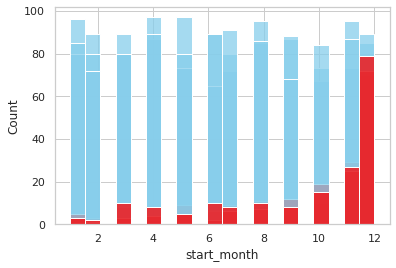

In [92]:
deltas = []
freq = 30
year = generate_year(freq)
N = 3

for i in range(N):
    time1 = time.time()
    tickets = generate_tickets(N, len(year), freq, year)
    plt = draw_plot(tickets)
    time2 = time.time()
    deltas.append([i, time2-time1])
    
perfomance = pd.DataFrame(deltas, columns=['N', 'perfomance_time'])
perfomance.to_csv('perfomance.csv')

/home/reeve/Code/PycharmProjects/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


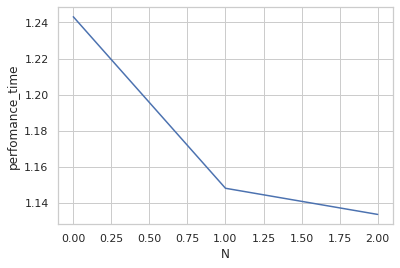

In [94]:
sns.lineplot(perfomance.N, perfomance.perfomance_time)
plt.show()


In [93]:
perfomance.head()

,N,perfomance_time
0,0,1.243190
1,1,1.148037
2,2,1.133532
